In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [50]:
data = pkl.load(open('./../input/allSNe.pkl', 'rb'))

In [51]:
df3 = pd.read_csv('./../..//utils/SESNessentials.csv', encoding="ISO-8859-1")

/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_1704/1289383584.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(data[key]['mag'])[np.asarray(data[key]['name']) == name][0]
/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_1704/1289383584.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asarray(data[key]['phase'])[np.asarray(data[key]['name']) == name][0]


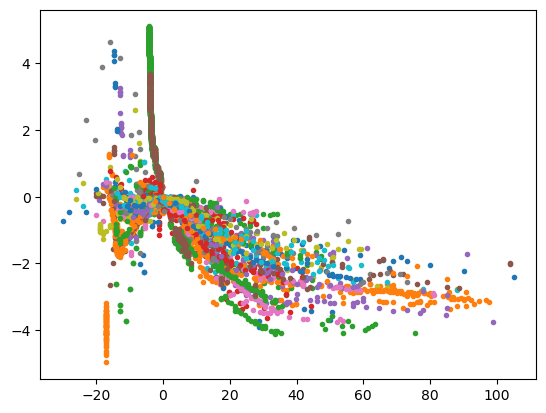

In [114]:
names = []
peak_mags = {'U':{'peaks':[], 'type':[], 'U-B':[], 'U-V':[], 'U-R':[], 'U-I':[], 'U-r':[], 'U-i':[], 'U-g':[]}, 
             'u':{'peaks':[], 'type':[]}, 
             'B':{'peaks':[], 'type':[], 'B-V':[], 'B-R':[], 'B-I':[], 'B-r':[], 'B-i':[], 'B-g':[]},  
             'V':{'peaks':[], 'type':[], 'V-R':[], 'V-I':[], 'V-r':[], 'V-i':[], 'g-V':[]}, 
             'R':{'peaks':[], 'type':[], 'R-I':[], 'R-i':[], 'R-g':[]}, 
             'I':{'peaks':[], 'type':[], 'I-g':[]}, 
             'g':{'peaks':[], 'type':[], 'g-r':[], 'g-i':[]}, 
             'r':{'peaks':[], 'type':[]}, 
             'i':{'peaks':[], 'type':[]}, 
             'J':{'peaks':[], 'type':[]}, 
             'H':{'peaks':[], 'type':[]}, 
             'K':{'peaks':[], 'type':[]}, 
             'w1':{'peaks':[], 'type':[]}, 
             'w2':{'peaks':[], 'type':[]}, 
             'm2':{'peaks':[], 'type':[]},
              }
for key in data.keys():
    names += data[key]['name']
    for name in data[key]['name']:
        y = np.asarray(data[key]['mag'])[np.asarray(data[key]['name']) == name][0]
        x = np.asarray(data[key]['phase'])[np.asarray(data[key]['name']) == name][0]
        y_min = y[np.argmin(np.abs(x))]
        if name.startswith('9') or name.startswith('8') or name.startswith('5') or name.startswith('6'):
            name = 'sn19'+name
        elif name.startswith('0') or name.startswith('1'):
            name = 'sn20'+name
        if len(x)<3:
            continue
        if x[np.argmin(y)]<-5 and np.max(x)<0:
            continue
        elif x[np.argmin(y)]<-5 and len(x[x<0])<5:
            continue
        elif x[np.argmin(y)]<-5 and np.max(x)>0:
            
            
            y_min = np.min(y[(x>-9) & (x<5)])
            x_min = x[(x>-9) & (x<5)][np.argmin(y[(x>-9) & (x<5)])]
            
            # print(name, key, df3.Type2[df3.SNname == name].values[0], x[np.argmin(y)], len(x[x<0]))
            plt.plot(x - x_min, y_min-y, '.')
            
        peak_mags[key]['peaks'].append(y_min)
        peak_mags[key]['type'].append(df3.Type2[df3.SNname == name].values[0])
        
    

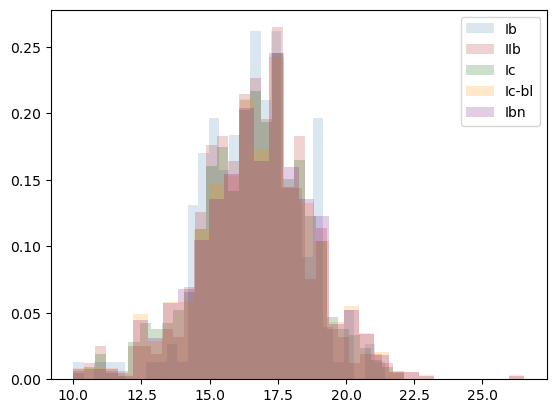

In [115]:
type_ = ['Ib', 'IIb', 'Ic', 'Ic-bl', 'Ibn']
colorTypes = {'IIb': ['FireBrick', 'd'],
              'Ib': ['SteelBlue', '^'],
              'Ic': ['DarkGreen', 's'],
              'Ic-bl': ['DarkOrange', 'o'],
              'Ibn': ['purple', 'v'],
              'other': ['black', 'x']}
peaks_tmp = np.array([])
for tp in type_:
    for key in peak_mags.keys():
        peaks_tmp = np.concatenate((np.asarray(peak_mags[key]['peaks'])[np.asarray(np.asarray(peak_mags[key]['type'])==tp)],
                                    peaks_tmp), axis=0)
        
    plt.hist(peaks_tmp,
             bins =30,
            label = tp,
            color = colorTypes[tp][0],
            alpha=0.2,
            density=True)

# plt.title('band= %s'%type_)
    
plt.legend()

In [6]:
SNe2 = np.unique(np.asarray(names))

In [7]:
SNe2

array(['01ig', '02ap', '02ji', '03bg', '03dh', '03id', '03jd', '04aw',
       '04dk', '04dn', '04ex', '04fe', '04ff', '04ge', '04gq', '04gt',
       '04gv', '05az', '05bf', '05by', '05em', '05fk', '05hg', '05hl',
       '05hm', '05kl', '05kr', '05ks', '05kz', '05mf', '06T', '06aj',
       '06ba', '06bf', '06cb', '06el', '06ep', '06fo', '06ir', '06jc',
       '06jo', '06lc', '06nx', '07C', '07I', '07Y', '07ag', '07ay',
       '07ce', '07cl', '07d', '07gr', '07ke', '07kj', '07ms', '07nc',
       '07qv', '07qw', '07ru', '07rz', '07uy', '08aq', '08ax', '08bo',
       '08cw', '08d', '09K', '09bb', '09er', '09iz', '09jf', '09mg',
       '09mk', '10X', '10al', '10as', '10ay', '10bh', '10cn', '10et',
       '10jr', '11am', '11bm', '11dh', '11ei', '11fu', '11hg', '11hs',
       '11hw', '12P', '12ap', '12au', '12bz', '12cd', '12hn', '13ak',
       '13cq', '13cu', '13df', '13dk', '13ge', '14C', '14L', '14ad',
       '15U', '15ap', '16bau', '16gkg', '16hgs', '17ein', '18bcc',
       '19aajs', '19a

In [8]:
data.keys()

dict_keys(['U', 'u', 'B', 'V', 'R', 'I', 'g', 'r', 'i', 'J', 'H', 'K', 'w1', 'w2', 'm2'])

In [103]:
name = '11hs'
band = 'u'
y = np.asarray(data[band]['mag'])[np.asarray(data[band]['name']) == name][0]
dy = np.asarray(data[band]['dmag'])[np.asarray(data[band]['name']) == name][0]
x = np.asarray(data[band]['phase'])[np.asarray(data[band]['name']) == name][0]
# print(dy[x<-10])

/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_1704/1403037810.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(data[band]['mag'])[np.asarray(data[band]['name']) == name][0]
/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_1704/1403037810.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dy = np.asarray(data[band]['dmag'])[np.asarray(data[band]['name']) == name][0]
/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_1704/1403037810.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested

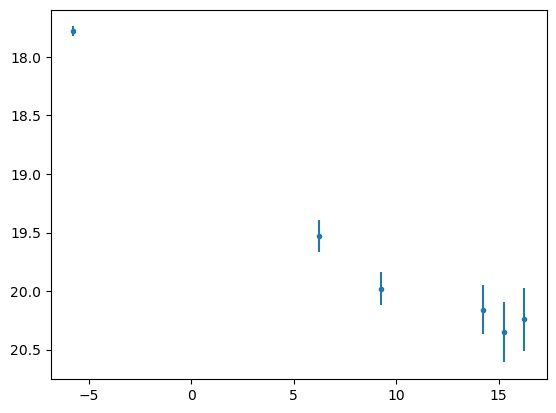

In [104]:
plt.errorbar(x,y, yerr=dy, fmt='.')
plt.gca().invert_yaxis()

IIb


In [82]:
SNe = []
for sn in df3['SNname'].values:
    if sn.startswith('#'):
        continue
    if sn.startswith('sn'):
        SNe.append(sn[4:])
    else:
        SNe.append(sn)
        

In [83]:
for sn in SNe:
    if not sn in SNe2:
        print(sn)